## 과제 1
ReLu activation function과 derivative function을 구현해보세요
- Hint : np.maximum 함수 사용하면 편리합니다
- 다른 방법 사용하셔도 무방합니다


In [1]:
def relu(x):
  return np.maximum(0,x)

In [2]:
def d_relu(x):
  return 1 if x > 0 else 0

## 과제 2
Deep Learning Basic 코드 파일의 MLP implementation with Numpy library using MNIST dataset 코드 참고해서
Three layer MLP 일 때의 backward_pass 함수를 완성해주세요.   
- Hint : 코드 파일의 예시는 Two layer MLP


In [3]:
def backward_pass(x, y_true, params):

  dS3 = params["A3"] - y_true

  grads = {}

  grads["dW3"] = np.dot(dS3, params["A2"].T)/x.shape[1]
  grads["db3"] = (1/x.shape[1])*np.sum(dS3, axis=1, keepdims=True)/x.shape[1]

  dA2 = np.dot(params["W3"].T, dS3)
  dS2 = dA2 * d_sigmoid(params["S2"])

  grads["dW2"] =  np.dot(dS2, params["A1"].T)/x.shape[1]
  grads["db2"] =  (1/x.shape[1])*np.sum(dS2, axis=1, keepdims=True)/x.shape[1]

  dA1 = np.dot(params["W2"].T, dS2)
  dS1 = dA1 * d_sigmoid(params["S1"])

  grads["dW1"] = np.dot(dS1, x.T)/x.shape[1]
  grads["db1"] = np.sum(dS1, axis=1, keepdims=True)/x.shape[1]
  
  return 

## 과제 3
Deep Learning Basic 코드 파일의 MLP implementation with Pytorch library using MNIST dataset 코드 참고해서
Three layer MLP를 구한후, 학습을 돌려 보세요

hyperparameter는 다음과 같이 설정

- epochs : 100
- hiddensize : 128, 64 (two layer)
- learning_rate : 0.5

In [15]:
# Assignment 3 구현은 여기서 ()

# import libraries
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [16]:
# set transform
transform = transforms.Compose([
    transforms.ToTensor()
])

In [17]:
# get dataset
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [18]:
# set loader
BATCH_SIZE = 512
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader =  DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

In [33]:
# make class
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Linear(784, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 784)
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.layer3(out)

    return out


In [34]:
model = Net()
model

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [35]:
# list(model.parameters())

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [40]:
def train(model, train_loader, optimizer):
    model.train()
    # 배치 당 loss 값을 담을 리스트 생성
    batch_losses = []

    for data, target in train_loader:
        # 옵티마이저의 기울기 초기화
        optimizer.zero_grad()

        # y pred 값 산출
        output = model(data)
        # loss 계산
        # 정답 데이터와의 cross entropy loss 계산
        # 이 loss를 배치 당 loss로 보관
        loss = criterion(output, target)
        batch_losses.append(loss)

        # 기울기 계산
        loss.backward()

        # 가중치 업데이트!
        optimizer.step()
        
    # 배치당 평균 loss 계산
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

In [41]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    batch_losses = []
    correct = 0 

    with torch.no_grad(): 
        for data, target in test_loader:
            # 예측값 생성
            output = model(data)

            # loss 계산 (이전과 동일)
            loss = criterion(output, target)
            batch_losses.append(loss)

           # Accuracy 계산
           # y pred와 y가 일치하면 correct에 1을 더해주기
            pred = output.max(1, keepdim=True)[1]

            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    # 배치 당 평균 loss 계산 
    avg_loss =  sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

In [42]:
EPOCHS = 100

for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

[1] Train Loss: 0.8584	Test Loss: 0.4181	Accuracy: 86.45%
[2] Train Loss: 0.2468	Test Loss: 0.2279	Accuracy: 92.80%
[3] Train Loss: 0.1741	Test Loss: 0.2273	Accuracy: 92.98%
[4] Train Loss: 0.1333	Test Loss: 0.2278	Accuracy: 92.43%
[5] Train Loss: 0.1085	Test Loss: 0.1893	Accuracy: 93.71%
[6] Train Loss: 0.0922	Test Loss: 0.1040	Accuracy: 96.81%
[7] Train Loss: 0.0780	Test Loss: 0.0839	Accuracy: 97.46%
[8] Train Loss: 0.0683	Test Loss: 0.0846	Accuracy: 97.36%
[9] Train Loss: 0.0596	Test Loss: 0.0828	Accuracy: 97.51%
[10] Train Loss: 0.0534	Test Loss: 0.2348	Accuracy: 92.80%
[11] Train Loss: 0.1425	Test Loss: 0.1055	Accuracy: 96.73%
[12] Train Loss: 0.0544	Test Loss: 0.0803	Accuracy: 97.46%
[13] Train Loss: 0.0452	Test Loss: 0.1991	Accuracy: 93.95%
[14] Train Loss: 1.2356	Test Loss: 0.2454	Accuracy: 92.71%
[15] Train Loss: 0.1873	Test Loss: 0.3477	Accuracy: 88.96%
[16] Train Loss: 0.1912	Test Loss: 0.3362	Accuracy: 90.67%
[17] Train Loss: 0.1404	Test Loss: 0.1587	Accuracy: 95.09%
[18] T

## 과제 4
과제 3 부분의 성능을 지금까지 배운 지식을 바탕으로 향상시켜보세요

- Hint : Activation function, hyperparameter setting

In [22]:
# Assignment 4 구현은 여기서 ()

# import libraries
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [23]:
# set transform
transform = transforms.Compose([
    transforms.ToTensor()
])

In [24]:
# get dataset
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [25]:
# set loader
BATCH_SIZE = 512
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader =  DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

In [26]:
# make class
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Linear(784, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 784)
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.layer3(out)

    return out


In [27]:
model = Net()
model

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [29]:
def train(model, train_loader, optimizer):
    model.train()
    # 배치 당 loss 값을 담을 리스트 생성
    batch_losses = []

    for data, target in train_loader:
        # 옵티마이저의 기울기 초기화
        optimizer.zero_grad()

        # y pred 값 산출
        output = model(data)
        # loss 계산
        # 정답 데이터와의 cross entropy loss 계산
        # 이 loss를 배치 당 loss로 보관
        loss = criterion(output, target)
        batch_losses.append(loss)

        # 기울기 계산
        loss.backward()

        # 가중치 업데이트!
        optimizer.step()
        
    # 배치당 평균 loss 계산
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

In [30]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    batch_losses = []
    correct = 0 

    with torch.no_grad(): 
        for data, target in test_loader:
            # 예측값 생성
            output = model(data)

            # loss 계산 (이전과 동일)
            loss = criterion(output, target)
            batch_losses.append(loss)

           # Accuracy 계산
           # y pred와 y가 일치하면 correct에 1을 더해주기
            pred = output.max(1, keepdim=True)[1]

            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    # 배치 당 평균 loss 계산 
    avg_loss =  sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

In [31]:
EPOCHS = 100

for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

[1] Train Loss: 2.2927	Test Loss: 2.2695	Accuracy: 33.55%
[2] Train Loss: 2.2451	Test Loss: 2.2083	Accuracy: 45.91%
[3] Train Loss: 2.1633	Test Loss: 2.0927	Accuracy: 55.82%
[4] Train Loss: 2.0035	Test Loss: 1.8700	Accuracy: 62.33%
[5] Train Loss: 1.7267	Test Loss: 1.5378	Accuracy: 68.38%
[6] Train Loss: 1.3911	Test Loss: 1.2139	Accuracy: 73.04%
[7] Train Loss: 1.1076	Test Loss: 0.9739	Accuracy: 77.00%
[8] Train Loss: 0.9101	Test Loss: 0.8174	Accuracy: 79.04%
[9] Train Loss: 0.7797	Test Loss: 0.7114	Accuracy: 81.11%
[10] Train Loss: 0.6905	Test Loss: 0.6386	Accuracy: 82.58%
[11] Train Loss: 0.6264	Test Loss: 0.5817	Accuracy: 84.06%
[12] Train Loss: 0.5786	Test Loss: 0.5409	Accuracy: 84.90%
[13] Train Loss: 0.5403	Test Loss: 0.5099	Accuracy: 85.67%
[14] Train Loss: 0.5113	Test Loss: 0.4831	Accuracy: 86.48%
[15] Train Loss: 0.4867	Test Loss: 0.4617	Accuracy: 87.04%
[16] Train Loss: 0.4650	Test Loss: 0.4399	Accuracy: 87.52%
[17] Train Loss: 0.4475	Test Loss: 0.4252	Accuracy: 87.95%
[18] T

**무엇을 보완하였고, 왜 보완되었는지에 대한 자유 서술 (아래에)**

---
* 우선, Assignment3에서 Loss가 최저점에 수렴하지 못하고 무질서하게 이탈하였음을 확인하였다.
* 이를 통해, learning rate가 크다는 문제점을 발견하고, lr 값을 0.01로 조정하였다.
* 결과적으로, Loss가 최저점에 잘 수렴하게 되었다.
---
* Activation function으로는 대표적으로 Sigmoid, Tanh, ReLU가 있다.
* Sigmoid, Tanh에 존재하는 기울기 소멸 문제 해결을 위해, ReLU를 사용하였다.
* 그래도 한번, Sigmoid를 사용하여 결과를 확인해보았다.
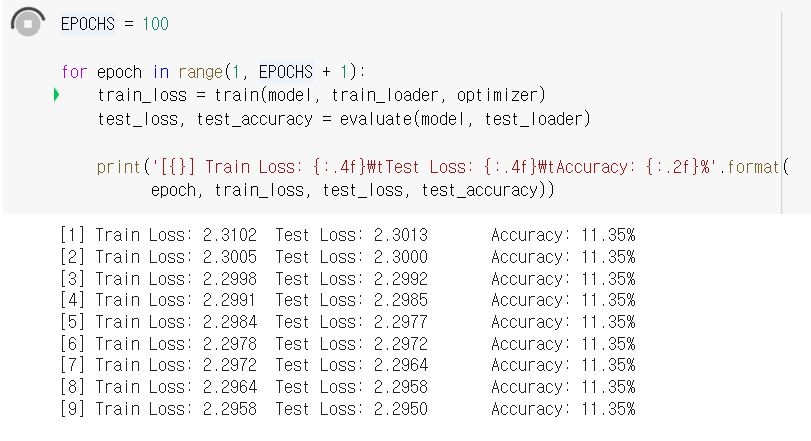
* 학습이 제대로 진행되지 있지 않음을 확인할 수 있다.
---